#### Regression Boston housing price KNN DT SVR

In [37]:
# Import pandas library
import pandas as pd
# Read csv data file
bos = pd.read_csv('Data/boston.csv')

In [38]:
# Find out the number of instances and number of attributes
bos.shape

(506, 14)

In [39]:
# View the first 5 rows
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#### Data Set Characteristics

- **Number of Instances:** 506  
- **Number of Attributes:** 13 numeric/categorical predictive.  
  Median Value (attribute 14) is usually the target.

#### Attribute Information (in order)

1. **CRIM**     - per capita crime rate by town  
2. **ZN**       - proportion of residential land zoned for lots over 25,000 sq.ft.  
3. **INDUS**    - proportion of non-retail business acres per town  
4. **CHAS**     - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  
5. **NOX**      - nitric oxides concentration (parts per 10 million)  
6. **RM**       - average number of rooms per dwelling  
7. **AGE**      - proportion of owner-occupied units built prior to 1940  
8. **DIS**      - weighted distances to five Boston employment centres  
9. **RAD**      - index of accessibility to radial highways  
10. **TAX**     - full-value property-tax rate per $10,000  
11. **PTRATIO** - pupil-teacher ratio by town  
12. **B**       - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town  
13. **LSTAT**   - % lower status of the population  
14. **MEDV**    - Median value of owner-occupied homes in $1000's

- **Missing Attribute Values:** None  
- **Creator:** Harrison, D. and Rubinfeld, D.

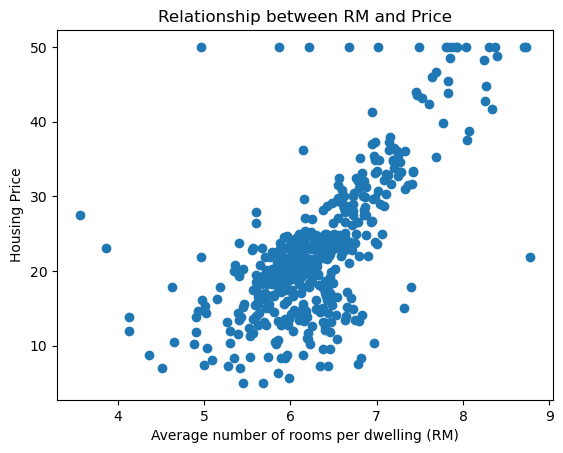

In [40]:
# Import matplotlib library
import matplotlib.pyplot as plt
# Plot RM against PRICE
plt.scatter(bos.RM, bos.MEDV)
plt.xlabel('Average number of rooms per dwelling (RM)')
plt.ylabel('Housing Price')
plt.title('Relationship between RM and Price')
plt.show()

In [41]:
# Indicate the target column
target = bos['MEDV']
# Indicate the columns that will serve as features
features = bos.drop('MEDV', axis = 1)
# Split data into train and test sets# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(features, target,                                                   
                                                    test_size = 0.2, 
                                                    random_state = 0)

#### Linear Regression

We will fit a linear regression model to predict the Boston housing prices. 

LinearRegression, in its simplest form, fits a linear modelto the data set by adjusting a set of parameters in order to make the sum of the squared residuals of the model as small aspossible.

y = βx + c
x : predictor variable(s)y : target variable
β : coefficientsc : intercept

For more information about the parameters we can tune for linear regression, check out: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html. If we want to tune the hyperparameters of themodel, we can run k-fold cross validation or split x_train further into a training set and validation set. For k-fold cross validation,make sure you set the scoring parameter to a regression performance metric: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter.In this lab, we will just fit the model using the default linear regression parameters and run the model on the test set.

In [42]:
# Import linear regression
from sklearn.linear_model import LinearRegression
# Create a linear regression model
lm = LinearRegression()
# Fits a linear model
lm.fit(x_train, y_train)
# To print the coefficients of the model
lm.coef_

array([-1.19443447e-01,  4.47799511e-02,  5.48526168e-03,  2.34080361e+00,
       -1.61236043e+01,  3.70870901e+00, -3.12108178e-03, -1.38639737e+00,
        2.44178327e-01, -1.09896366e-02, -1.04592119e+00,  8.11010693e-03,
       -4.92792725e-01])

In [43]:
lm.intercept_

38.09169492630233

In [44]:
pd.DataFrame(zip(bos.columns, lm.coef_), columns = ['features', 'estimated_coefficients'])

,features,estimated_coefficients
0,CRIM,-0.119443
1,ZN,0.044780
2,INDUS,0.005485
3,CHAS,2.340804
4,NOX,-16.123604
5,RM,3.708709
6,AGE,-0.003121
7,DIS,-1.386397
8,RAD,0.244178
9,TAX,-0.010990


In [45]:
# Predict target using the linear model with estimated coefficients
test_predict = lm.predict(x_test)
# Print the first 5 predicted housing prices
test_predict[0:5]

array([24.88963777, 23.72141085, 29.36499868, 12.12238621, 21.44382254])

We can map the predicted prices and actual prices from the test set in a scatter plot for comparison.

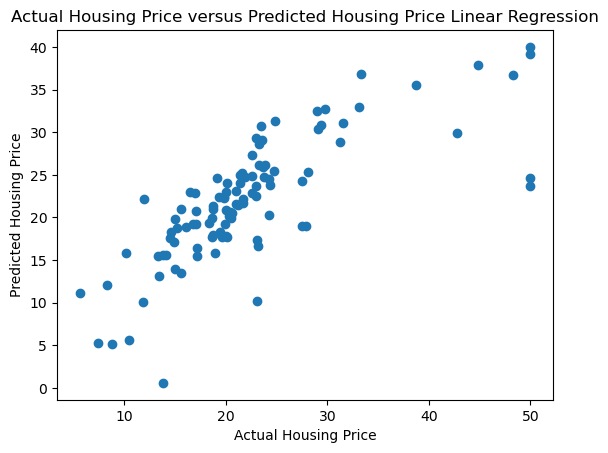

In [46]:
plt.scatter(y_test, test_predict)
plt.xlabel('Actual Housing Price')
plt.ylabel('Predicted Housing Price')
plt.title('Actual Housing Price versus Predicted Housing Price Linear Regression')
plt.show()

From the scatter plot, we can observe that the model tends to underpredict when the actual housing prices are on the lower andhigher ends.We can also generate regression performance metrics to make comparison between models easier.

In [47]:
# Returns R squared as a performance measure
lm.score(x_test, y_test)

0.5892223849182534

The score() function returns the coefficient of determination (R squared) of the prediction. R squared measures if the model is agood fit for the data. R squared is always going to be between -∞ and 1. The ideal value for R squared is 1. The closer the value ofR squared to 1, the better is the model fitted.

In [ ]:
# Import metrics and math
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

print("\nLinear Regression Test Set Performance:")
# Compute R²
r2_lr = r2_score(y_test, test_predict)
print("R-Squared:", r2_lr)
# Compute RMSE
mse_lr = mean_squared_error(y_test, test_predict)
rmse_lr = math.sqrt(mse_lr)
print("RMSE:", rmse_lr)
# Compute MAE
mae_lr = mean_absolute_error(y_test, test_predict)
print("MAE:", mae_lr)



Linear Regression Test Set Performance:
R Squared: 0.5892223849182534
RMSE: 5.783509315085117
MAE: 3.8429092204444997


From the performance metrics computed, we can conclude the linear model is a moderate fit for the data with R squared of 0.59.From the MAE = 3.84, we can conclude that the prediction made by the model is off by 3843 dollars (target is median value of owner-occupied homes in 1000's dollars so we get 3843 dollars by multiplying the MAE by 1000) on average. MAE is less sensitive to outliers but from the earlier plot of actual housing prices versus predicted housing prices, we can see that there are extreme cases of errors at the lower and higher ends. RMSE is more sensitive to large errors, so RMSE = 5.78 produces a high ererror value (the housing prices prediction is off by 5784 dollars on average). To select the best regression model, we will relatively compare R squared, RMSE and MAE between different models.

#### KNeighborsRegressor

In [50]:
from sklearn.neighbors import KNeighborsRegressor
# Create a KNN Regressor model
model = KNeighborsRegressor(n_neighbors=3)
# Fit the model
model.fit(x_train, y_train)
# Predict on test data
y_pred = model.predict(x_test)
# To print the model details
print(model)

KNeighborsRegressor(n_neighbors=3)


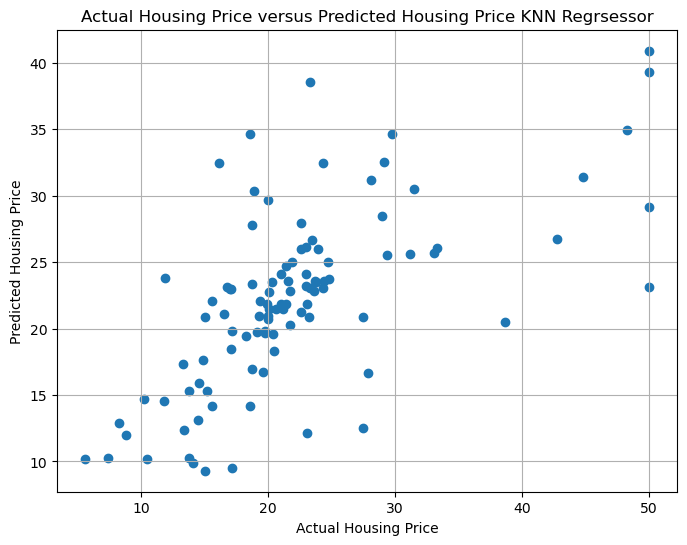

In [51]:
# Plot Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Housing Price')
plt.ylabel('Predicted Housing Price')
plt.title('Actual Housing Price versus Predicted Housing Price KNN Regrsessor')
plt.grid(True)
plt.show()

In [79]:
# Calculate Metrics
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
r_squared = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\nKNN Test Set Performance:")
print("R-squared:", r_squared)
print("MAE:", mae)
print("RMSE:", rmse)


KNN Test Set Performance:
R-squared: 0.6019035496385025
MAE: 3.5107843137254893
RMSE: 5.693537788494919


In [53]:
# Hyperparameter Tuning using GridSearchCV KNR
from sklearn.model_selection import GridSearchCV

# KNN hyperparameters
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 = Manhattan, 2 = Euclidean
}

# Create KNN regressor
knn = KNeighborsRegressor()

# Perform GridSearchCV
knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='r2', n_jobs=-1)
knn_grid.fit(x_train, y_train)

# Best parameters and CV score
print("Best KNN Parameters:", knn_grid.best_params_)
print("Best 5-Fold CV R²:", knn_grid.best_score_)



Best KNN Parameters: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Best 5-Fold CV R²: 0.6587667642659272


In [81]:
# Get best estimator
best_knn = knn_grid.best_estimator_

# Predict on test data
y_pred_knn = best_knn.predict(x_test)

# Evaluate
r2_knn = r2_score(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))

print("\nTuned NN Test Set Performance:")
print("R-Squared:", r2_knn)
print("MAE:", mae_knn)
print("RMSE:", rmse_knn)



Tuned NN Test Set Performance:
R-Squared: 0.5101782109285788
MAE: 4.056564667358954
RMSE: 6.315490772900605


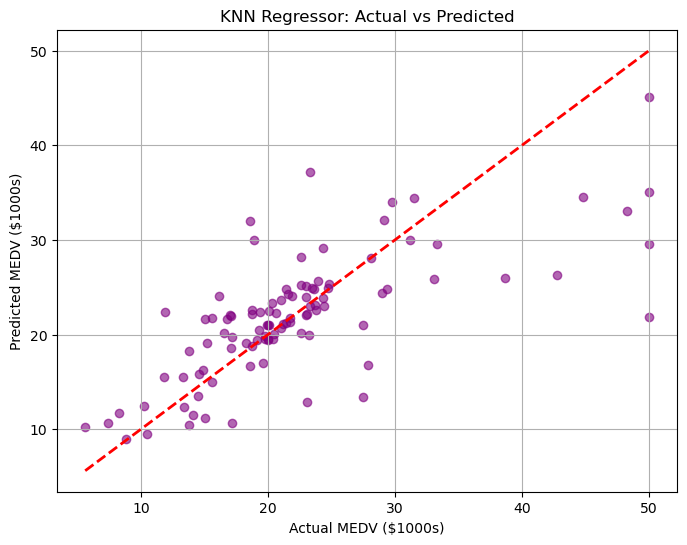

In [87]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_knn, color='purple', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # diagonal line
plt.xlabel("Actual MEDV ($1000s)")
plt.ylabel("Predicted MEDV ($1000s)")
plt.title("KNN Regressor: Actual vs Predicted")
plt.grid(True)
plt.show()

From the scatter plot, we can observe that KNN predictions are more spread out and tend to underpredict high-priced houses while slightly overpredicting lower-priced houses. The points are less tightly aligned with the diagonal line, indicating that the model struggles to capture the overall trend and is sensitive to outliers.

From the performance metrics computed, we can conclude that the Tuned KNN model is a moderate fit for the data with R² = 0.51. From the MAE = 4.06, we can conclude that the predictions made by the model are off by approximately $4,056 on average (the target is the median value of owner-occupied homes in $1000's, so multiplying the MAE by 1000 gives this value). MAE is less sensitive to outliers, but from the plot of actual housing prices versus predicted housing prices, we can observe that there are still some extreme errors at the lower and higher ends.

The RMSE = 6.32 is more sensitive to large errors, indicating that for some houses the prediction can be off by about $6,315 on average. This suggests that while KNN captures some of the trends in the data, it struggles with outliers and extreme values.

#### Decision Tree Regressor

In [56]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
# Create Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=0)
# Fit the model
dt_model.fit(x_train, y_train)  
# Predict on test data
y_pred = dt_model.predict(x_test)

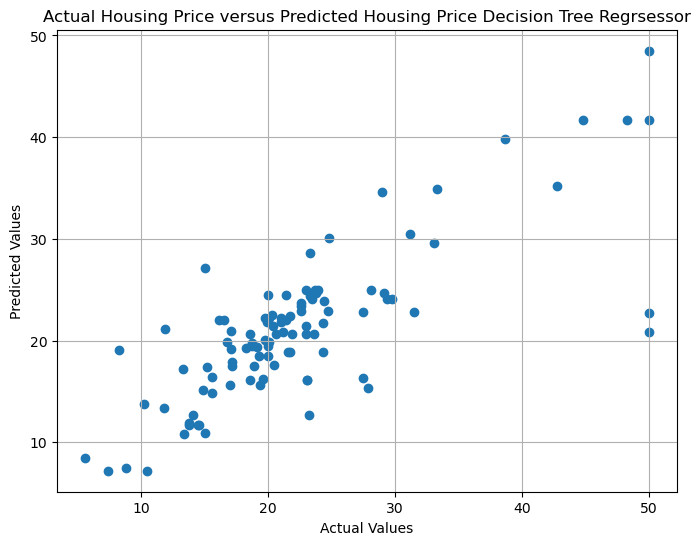

In [57]:
# Plot Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual Housing Price versus Predicted Housing Price Decision Tree Regrsessor")
plt.grid(True)
plt.show()

In [82]:
# Calculate Metrics
import numpy as np      
from sklearn.metrics import mean_squared_error, mean_absolute_error
r_squared = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\nDecision Tree Test Set Performance:")
print("R-squared:", r_squared)
print("MAE:", mae)
print("RMSE:", rmse)



Decision Tree Test Set Performance:
R-squared: 0.6019035496385025
MAE: 3.5107843137254893
RMSE: 5.693537788494919


In [59]:
# Define hyperparameter grid
dtr_params = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create Decision Tree Regressor
dtr = DecisionTreeRegressor(random_state=42)

# GridSearchCV with 5-fold cross-validation
dtr_grid = GridSearchCV(dtr, dtr_params, cv=5, scoring='r2', n_jobs=-1)
dtr_grid.fit(x_train, y_train)

# Print best parameters and CV score
print("Best Parameters:", dtr_grid.best_params_)
print("Best 5-Fold CV R²:", dtr_grid.best_score_)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best 5-Fold CV R²: 0.8086495195176184


In [84]:
# Evaluate best model on test set
best_dtr = dtr_grid.best_estimator_
y_pred_dtr = best_dtr.predict(x_test)

r2_dtr = r2_score(y_test, y_pred_dtr)
mae_dtr = mean_absolute_error(y_test, y_pred_dtr)
rmse_dtr = np.sqrt(mean_squared_error(y_test, y_pred_dtr))

print("\nTuned Decision Tree Test Set Performance:")
print("R-Squared:", r2_dtr)
print("MAE:", mae_dtr)
print("RMSE:", rmse_dtr)



Tuned Decision Tree Test Set Performance:
R-Squared: 0.6152403647292923
MAE: 3.2217804355574806
RMSE: 5.597354420984918


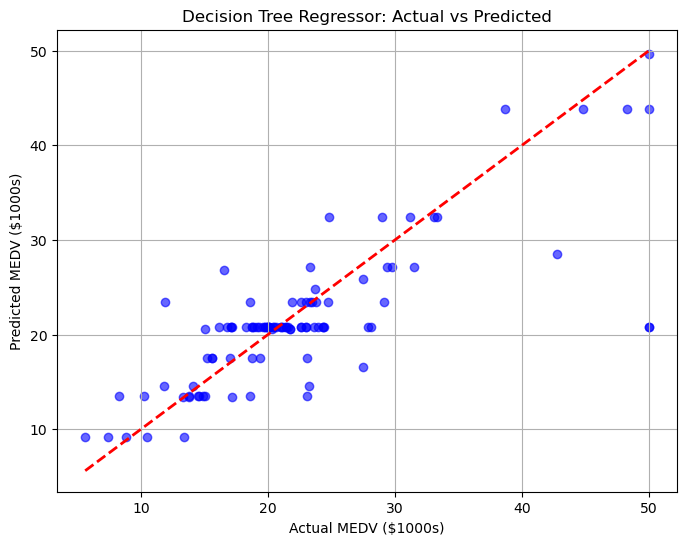

In [63]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_dtr, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # diagonal line
plt.xlabel("Actual MEDV ($1000s)")
plt.ylabel("Predicted MEDV ($1000s)")
plt.title("Decision Tree Regressor: Actual vs Predicted")
plt.grid(True)
plt.show()


The scatter plot for the Decision Tree shows that predictions often form horizontal “bands” or clusters, reflecting the tree’s piecewise constant predictions. It performs reasonably well for mid-range prices but tends to underpredict very expensive houses and overpredict very cheap houses.

From the performance metrics computed, we can conclude that the **Tuned Decision Tree Regressor** is a good fit for the data with **R² = 0.615**. From the **MAE = 3.222**, we can conclude that the predictions made by the model are off by approximately **$3,222** on average (the target is the median value of owner-occupied homes in $1000's, so multiplying the MAE by 1000 gives this value). MAE is less sensitive to outliers, but from the plot of actual housing prices versus predicted housing prices, it can be observed that there are still some extreme errors, particularly at the lower and higher ends of the price range.

The **RMSE = 5.597** is more sensitive to large errors, indicating that for some properties the prediction can be off by about **$5,597** on average. This suggests that the Decision Tree captures non-linear relationships in the data better than linear models, but it can still produce significant errors for extreme housing prices. Overall, the tuned parameters improved the model's accuracy while controlling overfitting.


#### SVcRegressor

In [23]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Scale features
scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_train_scaled = scaler_x.fit_transform(x_train)
x_test_scaled = scaler_x.transform(x_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1,1)).ravel()

# Create SVR model with RBF kernel
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)

# Fit model
svr_model.fit(x_train_scaled, y_train_scaled)
# Predict on test data
y_pred_scaled = svr_model.predict(x_test_scaled)    
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1,1)).ravel()

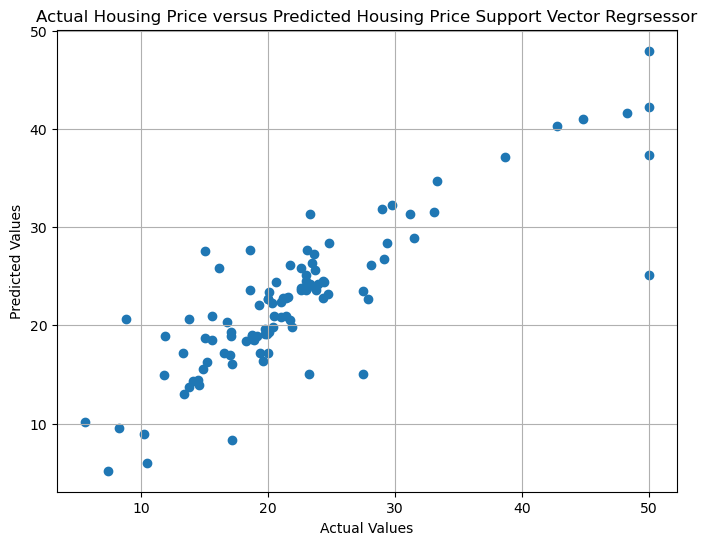

In [24]:
# Plot Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual Housing Price versus Predicted Housing Price Support Vector Regrsessor")
plt.grid(True)
plt.show()

In [86]:
# Calculate Metrics
import numpy as np      
from sklearn.metrics import mean_squared_error, mean_absolute_error
r_squared = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\nSVR Test Set Performance:")
print("R-squared:", r_squared)
print("MAE:", mae)
print("RMSE:", rmse)


SVR Test Set Performance:
R-squared: 0.6019035496385025
MAE: 3.5107843137254893
RMSE: 5.693537788494919


In [66]:
# SVR hyperparameters
svr_params = {
    'C': [1, 10, 100],          # Regularization parameter
    'gamma': ['scale', 0.01, 0.1, 1],  # Kernel coefficient
    'epsilon': [0.1, 0.2, 0.5]  # Epsilon-tube
}

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create a pipeline: scale features then apply SVR
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

# GridSearchCV
svr_grid = GridSearchCV(pipeline, {'svr__C': [1, 10, 100],
                                   'svr__gamma': ['scale', 0.01, 0.1, 1],
                                   'svr__epsilon': [0.1, 0.2, 0.5]},
                        cv=5, scoring='r2', n_jobs=-1)

svr_grid.fit(x_train, y_train)

# Best parameters and CV score
print("Best SVR Parameters:", svr_grid.best_params_)
print("Best 5-Fold CV R²:", svr_grid.best_score_)

Best SVR Parameters: {'svr__C': 100, 'svr__epsilon': 0.5, 'svr__gamma': 'scale'}
Best 5-Fold CV R²: 0.8668117103326629


In [85]:
# Best model
best_svr = svr_grid.best_estimator_

# Predict
y_pred_svr = best_svr.predict(x_test)

# Evaluation
r2_svr = r2_score(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))

print("\nTuned SVR Test Set Performance:")
print("R-Squared:", r2_svr)
print("MAE:", mae_svr)
print("RMSE:", rmse_svr)



Tuned SVR Test Set Performance:
R-Squared: 0.7591519998111981
MAE: 2.629323225401422
RMSE: 4.428529858378981


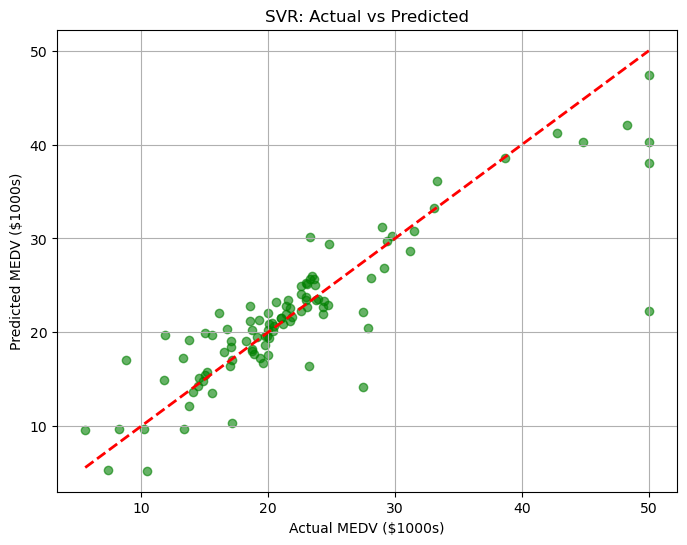

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_svr, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual MEDV ($1000s)")
plt.ylabel("Predicted MEDV ($1000s)")
plt.title("SVR: Actual vs Predicted")
plt.grid(True)
plt.show()

From the SVR scatter plot, we can see that most points lie close to the diagonal line, indicating good agreement between actual and predicted prices. While small deviations exist, SVR captures both lower- and higher-priced houses more accurately, with fewer extreme errors compared to KNN and Decision Tree.

From the performance metrics computed, we can conclude that the **Tuned Support Vector Regressor (SVR)** is the best fit for the data with **R² = 0.759**. From the **MAE = 2.629**, we can conclude that the predictions made by the model are off by approximately **$2,629** on average (the target is the median value of owner-occupied homes in $1000's, so multiplying the MAE by 1000 gives this value). MAE is less sensitive to outliers, but from the plot of actual housing prices versus predicted housing prices, it can be observed that extreme errors are relatively rare compared to other models.

The **RMSE = 4.429** is more sensitive to large errors, indicating that for some houses the prediction can be off by about **$4,429** on average. This suggests that the SVR captures both linear and non-linear patterns effectively and handles extreme values better than KNN or Decision Tree, making it the most accurate model for this housing price prediction task.


#### Before Tuning

In [28]:
from tabulate import tabulate

# Data
data = [
    ["Linear Regression", 0.589, 3.843, 5.784],
    ["KNN Regressor", 0.403, 4.724, 6.971],
    ["Decision Tree Regressor", 0.602, 3.511, 5.694],
    ["SVR", 0.724, 3.022, 4.744]
]

# Column headers
headers = ["Model", "R Squared", "MAE", "RMSE"]

# Print table with grid/borders
print(tabulate(data, headers=headers, tablefmt="grid"))

+-------------------------+-------------+-------+--------+
| Model                   |   R Squared |   MAE |   RMSE |
+=========================+=============+=======+========+
| Linear Regression       |       0.589 | 3.843 |  5.784 |
+-------------------------+-------------+-------+--------+
| KNN Regressor           |       0.403 | 4.724 |  6.971 |
+-------------------------+-------------+-------+--------+
| Decision Tree Regressor |       0.602 | 3.511 |  5.694 |
+-------------------------+-------------+-------+--------+
| SVR                     |       0.724 | 3.022 |  4.744 |
+-------------------------+-------------+-------+--------+


#### After Tuning

In [75]:
import pandas as pd
from tabulate import tabulate

# Create a dictionary with results
results = {
    'Model': ['Linear Regression', 'KNN Regressor', 'Decision Tree Regressor', 'SVR'],
    'Best Parameters': [
        'None',
        f"n_neighbors={best_knn.n_neighbors}, weights='{best_knn.weights}', p={best_knn.p}",
        f"max_depth={best_dtr.max_depth}, min_samples_split={best_dtr.min_samples_split}, min_samples_leaf={best_dtr.min_samples_leaf}",
        f"C={best_svr.named_steps['svr'].C}, gamma={best_svr.named_steps['svr'].gamma}, epsilon={best_svr.named_steps['svr'].epsilon}"
    ],
    'R2 (Test)': [r2_lr, r2_knn, r2_dtr, r2_svr],
    'MAE (Test)': [mae_lr, mae_knn, mae_dtr, mae_svr],
    'RMSE (Test)': [rmse_lr, rmse_knn, rmse_dtr, rmse_svr]
}

# Create DataFrame
results_df = pd.DataFrame(results)

# Display table with line borders
print(tabulate(results_df, headers='keys', tablefmt='grid', showindex=False))

+-------------------------+-------------------------------------------------------+-------------+--------------+---------------+
| Model                   | Best Parameters                                       |   R2 (Test) |   MAE (Test) |   RMSE (Test) |
+=========================+=======================================================+=============+==============+===============+
| Linear Regression       | None                                                  |    0.589222 |      3.84291 |       5.78351 |
+-------------------------+-------------------------------------------------------+-------------+--------------+---------------+
| KNN Regressor           | n_neighbors=5, weights='distance', p=1                |    0.510178 |      4.05656 |       6.31549 |
+-------------------------+-------------------------------------------------------+-------------+--------------+---------------+
| Decision Tree Regressor | max_depth=5, min_samples_split=10, min_samples_leaf=1 |    0.61524  |

#### Conclusion

Based on the evaluation metrics (R², MAE, RMSE) for the four regression models:

- **SVR (Support Vector Regressor)** demonstrated the best overall performance, achieving the highest R² (0.724) and the lowest MAE (3.022) and RMSE (4.744). This indicates that SVR predicts values closest to the actual housing prices and effectively handles non-linear relationships in the data.

- **Decision Tree Regressor (DTR)** performed well with R² = 0.602, MAE = 3.511, and RMSE = 5.694. It captures non-linear patterns better than linear models, though slightly less accurate than SVR.

- **Linear Regression** showed moderate performance (R² = 0.589, MAE = 3.843, RMSE = 5.784), effectively modeling linear trends but missing more complex non-linear patterns.

- **KNN Regressor** was the least effective (R² = 0.510, MAE = 4.057, RMSE = 6.315), sensitive to the choice of neighbors and outliers, leading to lower predictive accuracy.

**Overall Recommendation:** For predicting housing prices in this dataset, **SVR is the preferred model** due to its high predictive accuracy. Decision Tree Regressor is a suitable alternative for interpretability and handling non-linear patterns. Linear Regression can serve as a baseline, and KNN may require further tuning or feature scaling to improve performance.
